In [26]:
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv(r'C:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH2\predict+students+dropout+and+academic+success\data.csv', sep = ';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [28]:
df = df.dropna()

In [29]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [30]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [31]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [32]:
def encode_target(value) -> int:
    if isinstance(value, str):
        value = value.strip().lower()
        if value in ['enrolled', 'dropout']:
            return 0
        if value == 'graduate':
            return 1
    return -1

In [33]:
df['Target'] = df['Target'].apply(encode_target)

In [34]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [35]:
continous_columns = [
    'Previous qualification (grade)',
    'Admission grade',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]
for column in continous_columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

In [36]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804607,1,19,12,...,0,0,0,0,0.000000,0,-0.287982,0.124597,0.765621,0
1,1,15,1,9254,1,1,2.076423,1,1,3,...,0,6,6,6,13.666667,0,0.875907,-1.104870,0.347153,1
2,1,1,5,9070,1,1,-0.804607,1,37,37,...,0,6,0,0,0.000000,0,-0.287982,0.124597,0.765621,0
3,1,17,2,9773,1,1,-0.804607,1,38,37,...,0,6,10,5,12.400000,0,-0.813610,-1.466478,-1.375172,1
4,2,39,1,8014,0,1,-2.472572,1,37,38,...,0,6,6,6,13.000000,0,0.875907,-1.104870,0.347153,1


In [37]:
from matplotlib import pyplot as plt
import seaborn as sns

In [38]:
discrete_columns = [column for column in df.columns if column not in continous_columns]

In [39]:
num_features = len(df.columns) - 1
cov = np.zeros((num_features, num_features))

for i, col_name_i in enumerate(df.columns[:-1]):
    for j, col_name_j in enumerate(df.columns[:-1]):
        cov[i, j] = np.corrcoef(df[col_name_i].to_numpy(), df[col_name_j].to_numpy())[0, 1]

In [40]:
plt.figure(figsize=(100, 100))
sns.heatmap(cov, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1], annot=cov)

c:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH2\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

c:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH2\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


In [41]:
normalized_df = df.copy()

numeric_columns = df.select_dtypes(include=['number']).columns[:-1]  

for column in numeric_columns:
    normalized_df[column] = (df[column] - df[column].mean()) / df[column].std()

normalized_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294832,-0.095688,2.490294,-4.208544,0.350087,-0.350235,-0.804607,-0.126298,-0.036270,-0.670058,...,-0.282445,-2.837655,-2.042172,-1.471122,-1.962996,-0.199442,-0.287982,0.124597,0.765621,0
1,-0.294832,-0.210074,-0.554087,0.192609,0.350087,-0.350235,2.076423,-0.126298,-1.189915,-1.256690,...,-0.282445,-0.105625,-0.522568,0.518919,0.659489,-0.199442,0.875907,-1.104870,0.347153,1
2,-0.294832,-1.010777,2.490294,0.103452,0.350087,-0.350235,-0.804607,-0.126298,1.117376,0.959476,...,-0.282445,-0.105625,-2.042172,-1.471122,-1.962996,-0.199442,-0.287982,0.124597,0.765621,0
3,-0.294832,-0.095688,0.207008,0.444090,0.350087,-0.350235,-0.804607,-0.126298,1.181467,0.959476,...,-0.282445,-0.105625,0.490501,0.187246,0.416430,-0.199442,-0.813610,-1.466478,-1.375172,1
4,1.355852,1.162559,-0.554087,-0.408231,-2.855785,-0.350235,-2.472572,-0.126298,1.117376,1.024657,...,-0.282445,-0.105625,-0.522568,0.518919,0.531563,-0.199442,0.875907,-1.104870,0.347153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294832,-1.010777,3.251389,0.444090,0.350087,-0.350235,-0.577157,-0.126298,-1.189915,-1.387053,...,-0.282445,-0.105625,-0.016033,0.187246,0.467600,-0.199442,1.476624,1.137099,-1.789234,1
4420,-0.294832,-1.010777,0.207008,0.444090,0.350087,-0.350235,-0.956240,14.912854,-1.189915,-1.387053,...,-0.282445,-0.105625,-0.522568,-0.807775,0.147785,-0.199442,-0.175348,-0.453976,0.888959,0
4421,-0.294832,-1.010777,-0.554087,0.311808,0.350087,-0.350235,1.621524,-0.126298,1.117376,0.959476,...,-0.282445,0.805052,0.237234,-1.139448,0.627508,-0.199442,0.875907,-1.104870,0.347153,0
4422,-0.294832,-1.010777,-0.554087,0.140763,0.350087,-0.350235,3.592755,-0.126298,1.117376,0.959476,...,-0.282445,-0.560963,-0.522568,0.187246,0.339674,-0.199442,-0.813610,-1.466478,-1.375172,1


In [42]:
X = normalized_df.iloc[:, :-1]
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294832,-0.095688,2.490294,-4.208544,0.350087,-0.350235,-0.804607,-0.126298,-0.036270,-0.670058,...,-0.199274,-0.282445,-2.837655,-2.042172,-1.471122,-1.962996,-0.199442,-0.287982,0.124597,0.765621
1,-0.294832,-0.210074,-0.554087,0.192609,0.350087,-0.350235,2.076423,-0.126298,-1.189915,-1.256690,...,-0.199274,-0.282445,-0.105625,-0.522568,0.518919,0.659489,-0.199442,0.875907,-1.104870,0.347153
2,-0.294832,-1.010777,2.490294,0.103452,0.350087,-0.350235,-0.804607,-0.126298,1.117376,0.959476,...,-0.199274,-0.282445,-0.105625,-2.042172,-1.471122,-1.962996,-0.199442,-0.287982,0.124597,0.765621
3,-0.294832,-0.095688,0.207008,0.444090,0.350087,-0.350235,-0.804607,-0.126298,1.181467,0.959476,...,-0.199274,-0.282445,-0.105625,0.490501,0.187246,0.416430,-0.199442,-0.813610,-1.466478,-1.375172
4,1.355852,1.162559,-0.554087,-0.408231,-2.855785,-0.350235,-2.472572,-0.126298,1.117376,1.024657,...,-0.199274,-0.282445,-0.105625,-0.522568,0.518919,0.531563,-0.199442,0.875907,-1.104870,0.347153


In [43]:
y = normalized_df.iloc[:, -1]
y.value_counts()

Target
0    2214
1    2209
Name: count, dtype: int64

In [44]:
X = X.to_numpy()
X.shape

(4423, 36)

In [45]:
y = y.to_numpy().reshape(-1, 1)
y.shape

(4423, 1)

In [46]:
from tqdm import tqdm

In [47]:
import numpy as np
from tqdm import tqdm

class LogisticRegression: 
    def __init__(self, epoch: int = 1000, lr: float = 0.01) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
        self.theta = None  

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        eps = 1e-10  # Tránh log(0)
        y_hat = np.clip(y_hat, eps, 1 - eps)
        return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        predictions = (y_hat >= 0.5).astype(int)
        return (y == predictions).mean()
    
    def fit(self, X: np.ndarray, y: np.ndarray, lambda_reg=0.01) -> None:
        n, d = X.shape
        self.theta = np.zeros((d, 1))  

        for _ in tqdm(range(self.epoch), desc="Training Progress"):
            z = X @ self.theta
            y_hat = self.sigmoid(z)

            gradient = (X.T @ (y_hat - y)) / n + lambda_reg * self.theta 
            self.theta -= self.lr * gradient

            loss = self.loss_fn(y, y_hat) + (lambda_reg / (2 * n)) * np.sum(self.theta ** 2)
            acc = self.accuracy(y, y_hat)

            self.losses.append(loss)
            self.metrics.append(acc)


    def predict(self, X: np.ndarray) -> np.ndarray:
        y_hat = self.sigmoid(X @ self.theta)
        return (y_hat >= 0.5).astype(int)

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        return self.sigmoid(X @ self.theta)

In [48]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values.reshape(-1, 1)

np.random.seed(42)
indices = np.random.permutation(len(X)) 

train_size = int(0.8 * len(X))  

X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (3538, 36), Test size: (885, 36)


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 1806.33it/s]


Accuracy: 52.66%


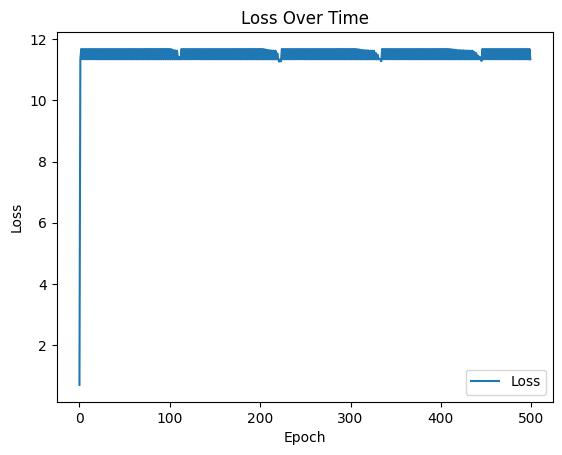

In [49]:
model = LogisticRegression(epoch=500, lr=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = model.accuracy(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")

plt.plot(model.losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()
plt.show()